In [2]:
import rpy2.robjects as robjects
robjects.r['load']("datasets/chapter6_mix/colon_data.RData")
from rpy2.robjects import r, pandas2ri
import pandas as pd


In [3]:
#the data in this example is from https://www.biorxiv.org/content/10.1101/2020.08.02.233460v1.full
colon_data = robjects.r['colon_data']

data_dict = {name: pandas2ri.rpy2py(colon_data.rx2(name)) for name in colon_data.names}
colon_df = pd.DataFrame({ky:vl for (ky, vl) in data_dict.items() if ky!="rnames"})

print(colon_df.head())
colon_df.to_csv("datasets/chapter6_mix/colon_data.csv", index=False)

       x3       y3      x2      y2      x1      y1
0  0.4961   7.0504  0.4369  1.6771  0.6340  1.6771
1  0.2548  13.6158  0.0786  4.8701  0.6863  4.8701
2  0.6317  11.8952  0.0565  8.7187  0.6791  8.7187
3  0.5511  11.2385  0.1747  6.5099  0.5836  6.5099
4  0.3920  12.7051  0.1199  8.7359  0.6337  8.7359


In [18]:
print(colon_df)

         x3       y3      x2      y2      x1      y1
0    0.4961   7.0504  0.4369  1.6771  0.6340  1.6771
1    0.2548  13.6158  0.0786  4.8701  0.6863  4.8701
2    0.6317  11.8952  0.0565  8.7187  0.6791  8.7187
3    0.5511  11.2385  0.1747  6.5099  0.5836  6.5099
4    0.3920  12.7051  0.1199  8.7359  0.6337  8.7359
..      ...      ...     ...     ...     ...     ...
294  0.4903  12.7789  0.0773  7.9947  0.6537  7.9947
295  0.8201  12.6162  0.5142  3.3818  0.7230  3.3818
296  0.4204   9.7766  0.5322  3.2701  0.6353  3.2701
297  0.2949  13.4925  0.4870  2.7125  0.6794  2.7125
298  0.7698  11.0599  0.0715  3.2055  0.7251  3.2055

[299 rows x 6 columns]


In [6]:
##checking information
from rpy2.robjects import r

# r('library(RobMixReg); data("colon_data", package="RobMixReg")')

rnames_value = r('colon_data[["rnames"]]')
print(list(rnames_value))


['132709 CREB3L1 cg16012690']


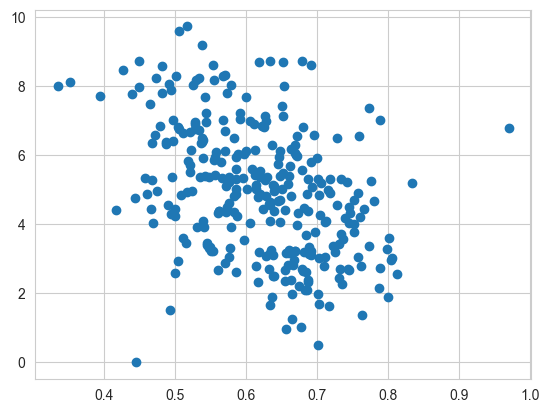

In [3]:
import matplotlib.pyplot as plt
plt.scatter (colon_df.x1, colon_df.y1)

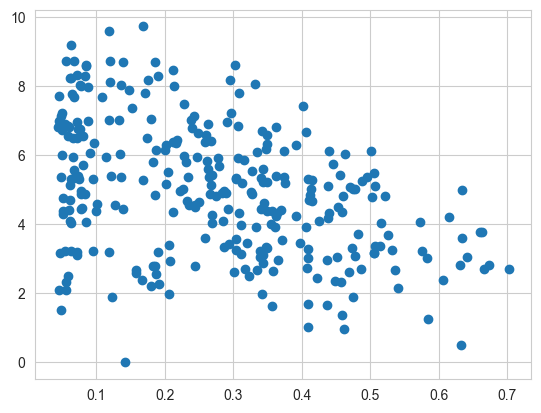

In [4]:
import matplotlib.pyplot as plt
plt.scatter (colon_df.x2, colon_df.y2)

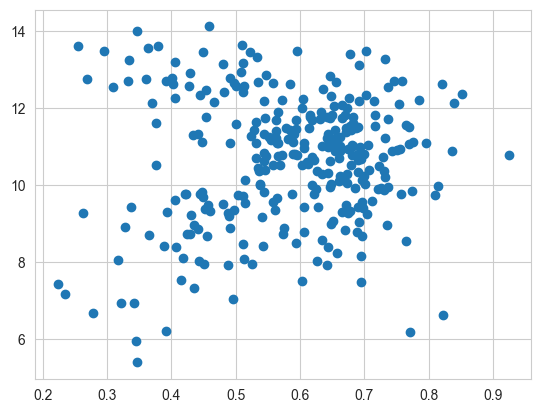

In [5]:

plt.scatter (colon_df.x3, colon_df.y3)

In [7]:
from src.exp.exp_change import CD
import numpy as np

def run_cmm_on_node_pair(df1,df2,ret_model=False):
    mixed_X = np.vstack([ df1, df2 ]).T #np.vstack([colon_df.x1, colon_df.y1 ]).T
    method_name = CD.CausalMixtures
    method = method_name.get_method()
    method.fit(mixed_X)
    method.model.visu_scatter_mixing_assignment_pair(0,1)
    method.model.visu_scatter_mixing_assignment_pair(1,0)
    if ret_model: return method.model

C:\Users\msara\anaconda3\envs\causalchange\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DataMode.MIXED


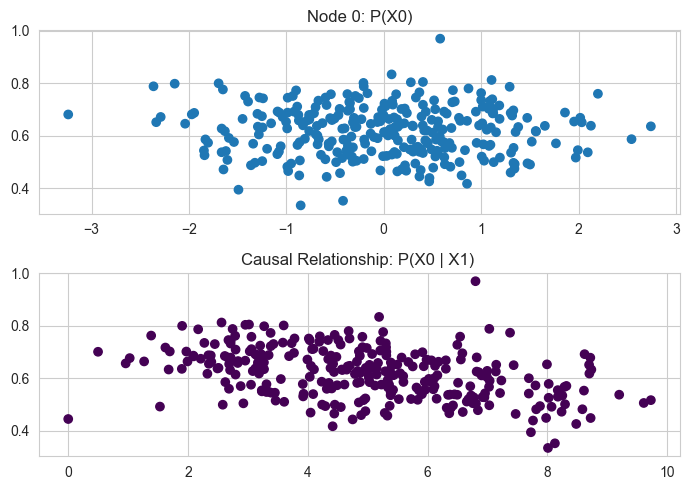

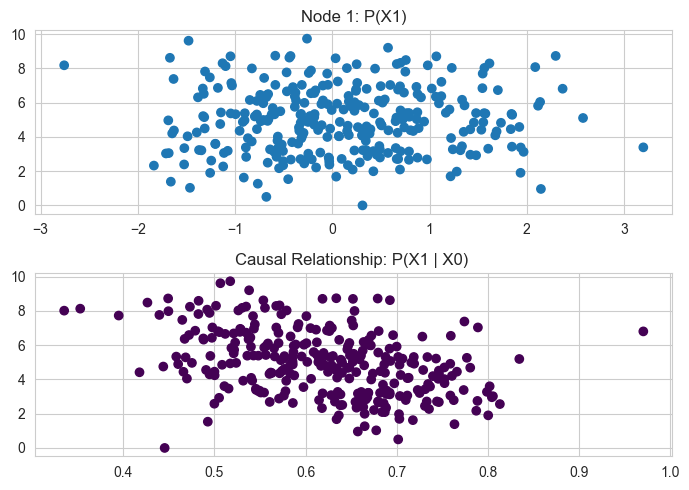

In [8]:
gene_expression1, methylation1 =colon_df.x1, colon_df.y1
model1 = run_cmm_on_node_pair(gene_expression1, methylation1, ret_model=True)
assignments1_expression =  model1.idls[0]
assignments1_methylation =  model1.idls[1]

DataMode.MIXED


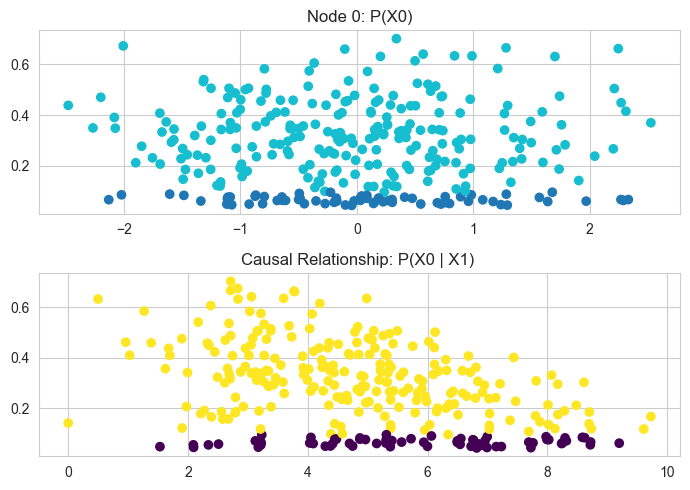

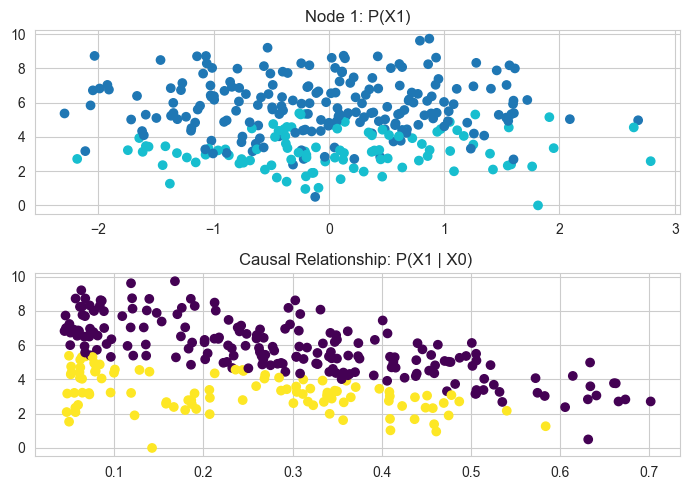

In [9]:
gene_expression2, methylation2 = colon_df.x2, colon_df.y2
model2 = run_cmm_on_node_pair(gene_expression2, methylation2, ret_model=True)
assignments2_expression =  model2.idls[0]
assignments2_methylation =  model2.idls[1]

DataMode.MIXED


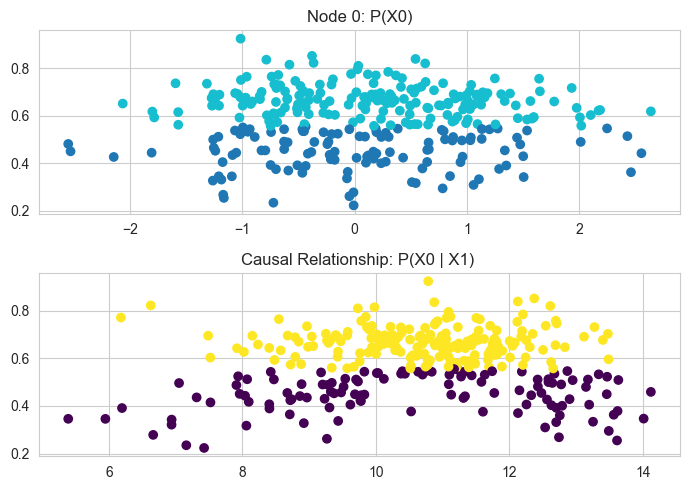

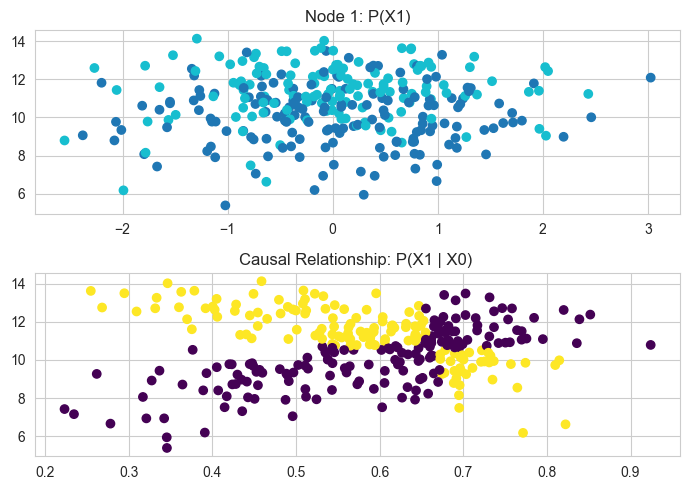

In [10]:
gene_expression3, methylation3 = colon_df.x3, colon_df.y3
model3 = run_cmm_on_node_pair(gene_expression3, methylation3, ret_model=True)
assignments3_expression =  model3.idls[0]
assignments3_methylation =  model3.idls[1]

C:\Users\msara\AppData\Local\Temp\ipykernel_14652\2419767870.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_i = plt.cm.get_cmap('tab10', len(np.unique(assignments)))


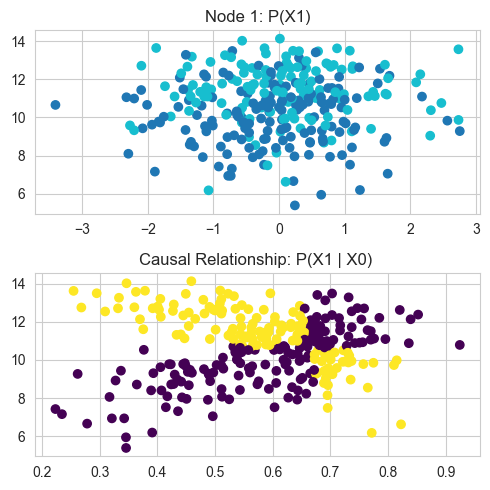

In [13]:
#reproducing the figure
import matplotlib.pyplot as plt
assignments =  model3.idls[1]
pa_i = [0]
i = 1
fig, axes = plt.subplots(len(pa_i) + 1, 1, figsize=(5,5))
X =  np.vstack([colon_df.x3, colon_df.y3]).T
ax1 = axes if len(pa_i) < 1 else axes[0]
ax1.set_title(f"Node {i}: P(X{i})")

cmap_i = plt.cm.get_cmap('tab10', len(np.unique(assignments)))
ax1.scatter(
    np.random.normal(size=X[:, i].shape),
    X[:, i], c=assignments,
    cmap=cmap_i
)
for ix, pa in enumerate(pa_i):
    axes[1 + ix].scatter(X[:, pa], X[:, i], c=assignments, cmap='viridis')
    axes[1 + ix].set_title(f"Causal Relationship: P(X{i} | X{pa}) ")

plt.tight_layout()

plt.tight_layout()
plt.show()

In [25]:
print("1. ", model1.topic_graph.edges)
print("2. ", model2.topic_graph.edges)
print("3. ", model3.topic_graph.edges)

1.  [(1, 0)]
2.  [(0, 1)]
3.  [(0, 1)]


In [38]:
df = pd.DataFrame(np.vstack([colon_df.x1, colon_df.y1, assignments1_expression, assignments1_methylation]).T)
df.to_csv("datasets/chapter6_mix/colon_data_cmm_1.csv", index=False, sep="\t", header=["x1", "y1", "assignments1_expression", "assignments1_methylation"])

df = pd.DataFrame(np.vstack([colon_df.x2, colon_df.y2, assignments2_expression, assignments2_methylation]).T)
df.to_csv("datasets/chapter6_mix/colon_data_cmm_2.csv", index=False, sep="\t", header=["x2", "y2", "assignments2_expression", "assignments2_methylation"])

df = pd.DataFrame(np.vstack([colon_df.x3, colon_df.y3, assignments3_expression, assignments3_methylation]).T)
df.to_csv("datasets/chapter6_mix/colon_data_cmm_3.csv", index=False, sep="\t",header=["x3", "y3", "assignments3_expression", "assignments3_methylation"])